# CEAD ML project on the Ringenprinter. 

### Welcome to the Notebook in which I will explore and visualize the data of the collected data.  


## Imports and Settings

In [1]:
# imports
# system related
import sys
import subprocess

# basics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from datetime import datetime, time

# ml related
import sklearn as sk
import torch
import torch.nn as nn

# import scripts and functions
from functions import *


print('imports succesfull')

imports succesfull


In [2]:
# settings of pandas, usefull for data exploration
pd.options.display.width = 0
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 50)
# if reset is required:
# pd.reset_option('all')

## Import and Preprocessing data

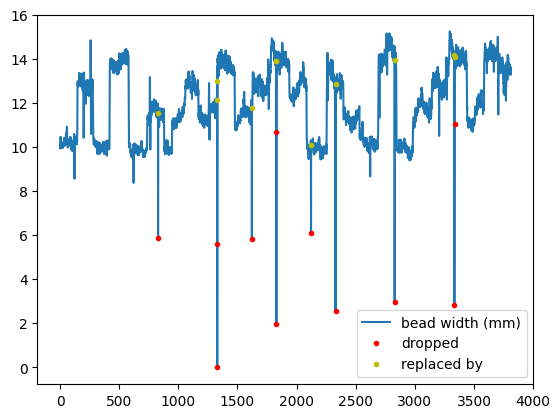

import and preprocessing data succesfull


In [3]:
# Defining import variables, _s stands for small
loc_s = '../data/dataset_small_23-09_14.04.45-14.17.30.csv'
start_s = '2022-09-23 14:04:45.000'
end_s = '2022-09-23 14:17:30.000'

# import, filter and outlier replacement on bead_width (mm)
df_s = import_csv_filt(loc_s, start_s, end_s, plot_outliers=True)

print('import and preprocessing data succesfull')

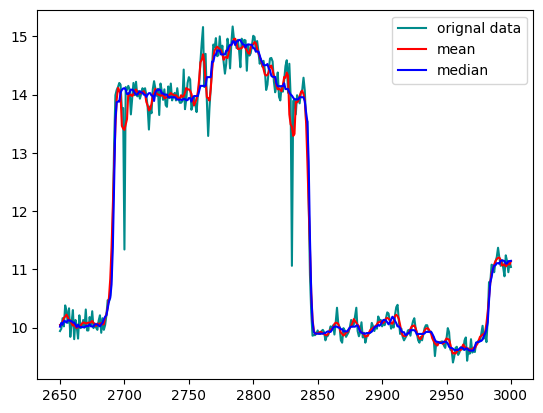

The median filtering shows good behaviour on the bead data: The data is smoother and there is no sign of lag. I chose this method for filtering the bead width.


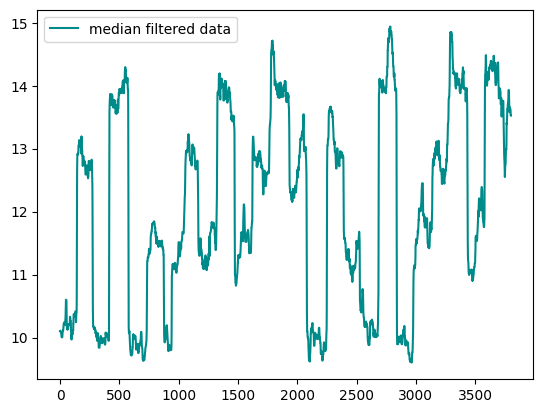

In [4]:
bead_gauss = df_s['bead_width (mm)'].rolling(window=5, win_type='gaussian', center=True).mean(std=5)
bead_median = df_s['bead_width (mm)'].rolling(window=10, center=True).median()


plt.plot(df_s.loc[2650:3000, 'bead_width (mm)'], 'darkcyan', label='orignal data')
plt.plot(bead_gauss.loc[2650:3000], 'red', label='mean')
plt.plot(bead_median.loc[2650:3000], 'blue', label='median')
plt.legend()
plt.show()

print('The median filtering shows good behaviour on the bead data: The data is smoother and there is no sign of lag. I chose this method for filtering the bead width.')
df_s_medianFilt = df_s.copy(deep=True)
df_s_medianFilt['bead_width (mm)'] = bead_median
df_s_medianFilt.drop(df_s_medianFilt.head(5).index.union(df_s_medianFilt.tail(5).index), inplace=True)
df_s_medianFilt = df_s_medianFilt.reset_index()

# print(df_s_medianFilt)

plt.plot(df_s_medianFilt.loc[:, 'bead_width (mm)'], 'darkcyan', label='median filtered data')
plt.legend()
plt.show()




## Exploration

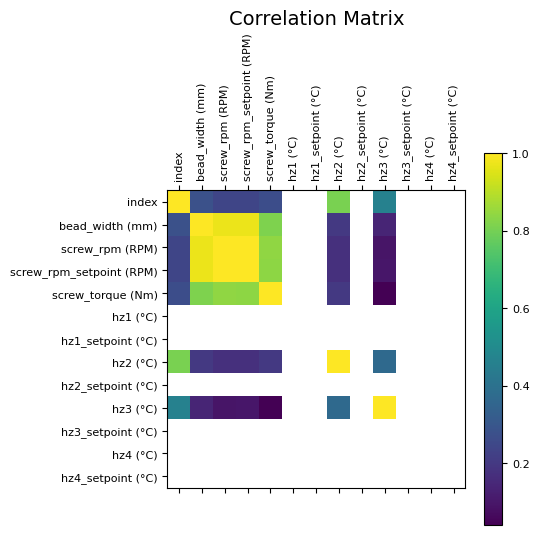

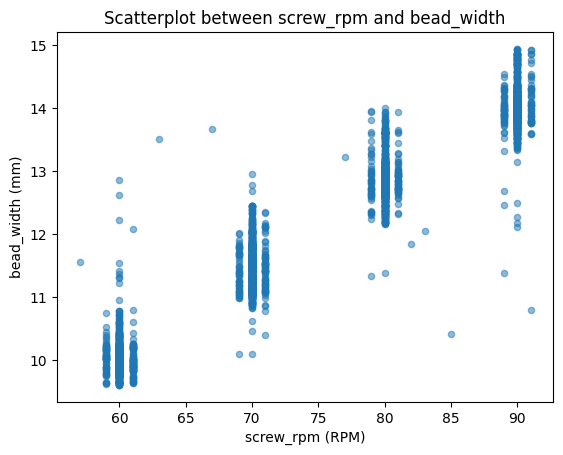

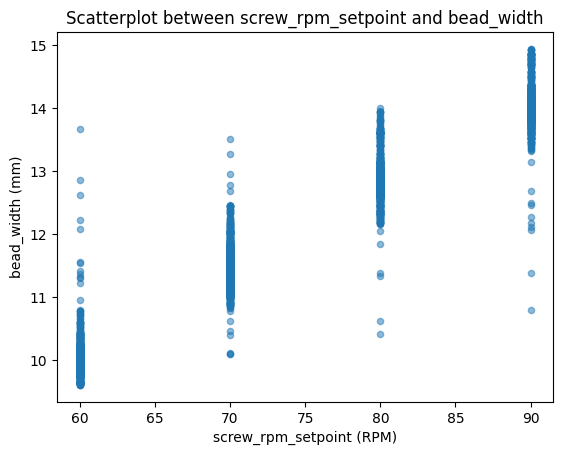

<Figure size 600x500 with 0 Axes>

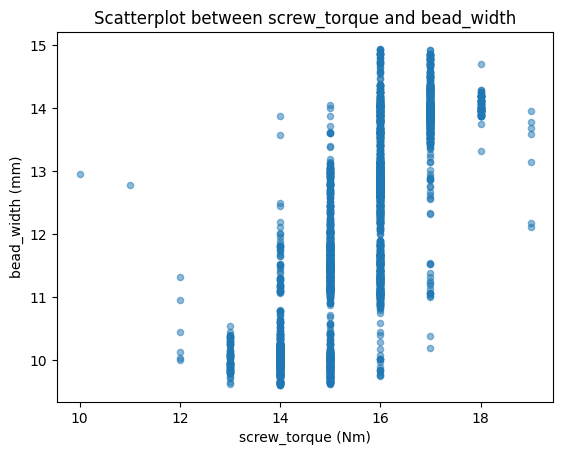

In [5]:
# plots

plt.matshow(df_s_medianFilt.corr())
plt.xticks(range(df_s_medianFilt.select_dtypes(['number']).shape[1]), df_s_medianFilt.select_dtypes(['number']).columns, fontsize=8, rotation=90)
plt.yticks(range(df_s_medianFilt.select_dtypes(['number']).shape[1]), df_s_medianFilt.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

df_s_medianFilt.plot.scatter(x='screw_rpm (RPM)', y='bead_width (mm)', alpha = 0.5)
plt.title('Scatterplot between screw_rpm and bead_width')
plt.show()

df_s_medianFilt.plot.scatter(x='screw_rpm_setpoint (RPM)', y='bead_width (mm)', alpha = 0.5)
plt.title('Scatterplot between screw_rpm_setpoint and bead_width')
plt.show()


f = plt.figure(figsize=(6, 5))
df_s_medianFilt.plot.scatter(x='screw_torque (Nm)', y='bead_width (mm)', alpha = 0.5)
plt.title('Scatterplot between screw_torque and bead_width')
plt.show()


## Filtering on used features only and adding history to selected features

In [6]:
# filtering dataset so only used columns are present
columns_to_keep = ['bead_width (mm)', 'screw_rpm (RPM)']

df_s_lean = df_s_medianFilt[columns_to_keep]

# add history of some columns
to_expand_columns = ['screw_rpm (RPM)']
df_s_lean = df_add_column_history(df_s_lean, to_expand_columns, n_columns=0, steps=2)

## Preparing data for ML use

In [7]:
# splitting features from supervisory data
X, y = split_to_np_feat_and_ans(df_s_lean)

# scale data and normalise data

# splitting the Train and Test data
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

## Exploring ML models

#### Linear Regression

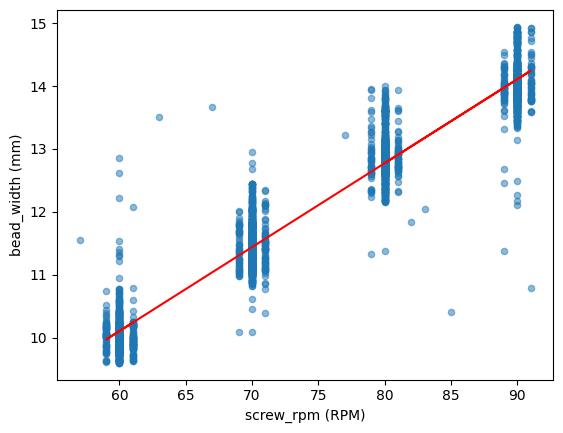

mean squared error is :  0.1546301169289167
          r2 score is :  0.9305819399827235

      std of error is :  0.3932290461533006


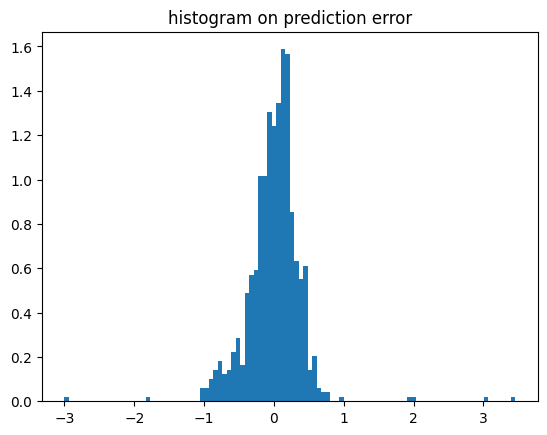

1

In [8]:
# imports
from sklearn.linear_model import LinearRegression

# create model
clf_lin = LinearRegression() 

# train model
clf_lin.fit(X, y)


# predict on test set
y_pred = clf_lin.predict(X_test)


# plot result
df_s_lean.plot.scatter(x='screw_rpm (RPM)', y='bead_width (mm)', alpha = 0.5)
plt.plot(X_test, y_pred, 'r')
plt.show()



give_prediction_score(y_test, y_pred)


coefficients: 
 0.1332876326382246
intercept: 
 2.11211470644807


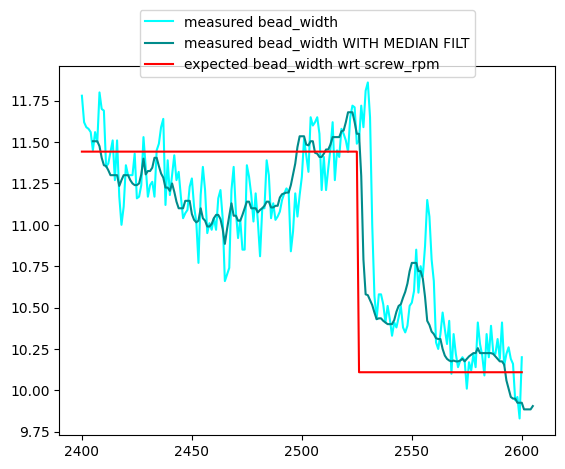

In [34]:
# transitie database van screw rpm
# plot afwijking op verwachte waarde -> 

a = clf_lin.coef_[0]
b = clf_lin.intercept_


print("coefficients: \n", a)
print("intercept: \n", b)

df_eo = df_s_medianFilt.copy(deep=True)
df_eo['expected_bead_width (mm)'] = df_eo['screw_rpm_setpoint (RPM)'] * a + b

df_s_copy = df_s.copy(deep=True)
df_s_copy.drop(df_s_copy.head(5).index.union(df_s_cop.tail(5).index)

plt.plot(df_s.loc[2400:2600, 'bead_width (mm)'], 'cyan', label='measured bead_width')
plt.plot(df_eo.loc[2405:2605, 'bead_width (mm)'], 'darkcyan', label='measured bead_width WITH MEDIAN FILT')
plt.plot(df_eo.loc[2400:2600, 'expected_bead_width (mm)'], 'red', label='expected bead_width wrt screw_rpm')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.17), fancybox=True)
plt.show()

